In [37]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from typing import List
from hnlp_proj.utils import extract_authors, flip_hebrew_text, combine_texts
from hnlp_proj.plot_utils import plot_hebrew_barchart

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


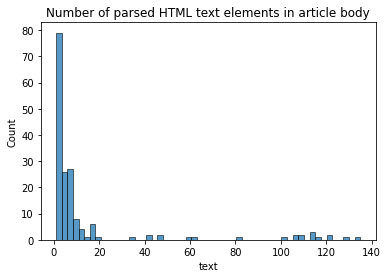

In [102]:
texts = pd.read_json("./scrape/ynet.jl", lines=True)
lens = texts.text.apply(len)
text_len_count = lens.value_counts()#.rename("count").reset_index()#.rename({"index": "len"})
sns.histplot(text_len_count).set_title("Number of parsed HTML text elements in article body")
plt.show()
texts.text = texts.text.apply(combine_texts)

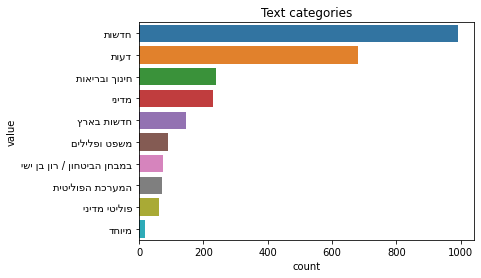

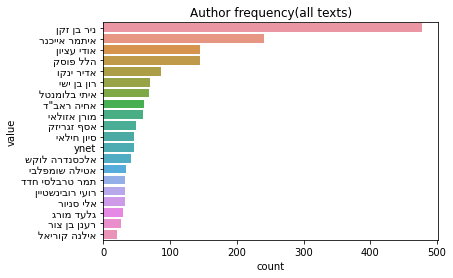

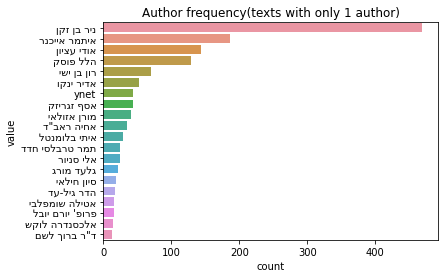

In [103]:
# Plotting frequency of categories
plot_hebrew_barchart(texts.category, 20, title="Text categories")

# Plotting author frequency of texts
NUM_AUTHORS = 20
texts.authors = texts.authors.apply(extract_authors)
plot_hebrew_barchart(texts.authors, NUM_AUTHORS, title="Author frequency(all texts)")

# find all texts that only have 1 author
one_author_df = texts[texts.authors.str.len() == 1]
plot_hebrew_barchart(one_author_df.authors, NUM_AUTHORS, title="Author frequency(texts with only 1 author)")

In [9]:
print(f"Out of {len(texts)} articles, {len(one_author_df)} of them were written by exactly 1 author")

Out of 2607 articles, 1900 of them were written by exactly 1 author


In [104]:
# find texts with no author(Faulty parsing?)
no_author_df = texts[texts.authors.str.len() == 0]
no_author_df.fmt.value_counts()
no_author_df.iloc[0].text

'ארצות הברית אישרה בימים האחרונים העברת עשרות מיליוני דולרים נוספים לפלסטינים, לאחר שהנשיא החדש ג\'ו ביידן חידש את התמיכה שנפסקה בימי הנשיא הקודם דונלד טראמפ. ביום חמישי האחרון הודיעה שגרירת ארה"ב באו"ם לינדה תומס גרינפילד על והערב (ד\') דיווחה סוכנות הידיעות AP כי יום לאחר מכן עדכן הממשל האמריקני את הקונגרס על סכום של 75 מיליון דולר שיועברו לפלסטינים. בניגוד לתמיכה הראשונית, ממשל ביידן לא פרסם את דבר העברת אותם 75 מיליון דולר ועדיין לא ברור אם 15 מיליון הדולר כלולים בתוכם או שמדובר בתמיכה נוספת. על פי הודעת הממשל לקונגרס, חלק מהכספים הועברו או יועברו בקרוב. הם לא יגיעו ישירות לרשות הפלסטינית, אלא מיועדים לפרויקטים הומניטריים וכלכלים דחופים בגדה וברצועה. מדובר בחלק משינוי המגמה של ארצות הברית ביחסה אל המזרח התיכון תחת הנשיא ביידן. התמיכה הכלכלית מיועדת ככל הנראה על מנת לעודד את הפלסטינים לשוב אל שולחן המשא ומתן עם ישראל, אם יהיה כזה. ביום חמישי כינתה השגרירה תומס גרינפילד את הסיוע כחידוש המחויבות עבור העם הפלסטיני: "הסיוע יעזור לפלסטינים במצוקה קשה ויביא יותר יציבות וביטחון גם לישראלים